In [1]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
sns.set_palette("Dark2")

In [2]:
import numpy as np

results = pd.read_parquet("./timing_models_scaling_ttf.gzip")
results = results[np.isin(results["model"], ("fitted-rolling-ttf", "rolling-ttf", "fitted-naive"))].copy()

def _config(s: pd.Series):
    if s["model"] == "rolling-ttf":
        return s["neuroticism"][0].upper() + s["neuroticism"][1:] + " neuroticism"
    elif s["model"] == "fitted-rolling-ttf":
        return "ExGaussian fit,\n" + s["neuroticism"] + " neuroticism"
    else:
        return "Reference"

results["Configuration"] = (
    results[["model", "neuroticism"]]
    .apply(_config, axis=1)
    .astype(pd.CategoricalDtype(["Low neuroticism", "High neuroticism", "ExGaussian fit,\nlow neuroticism", "ExGaussian fit,\nhigh neuroticism", "Reference"]))
)

results["cumulative_duration_min"] = results["cumulative_duration"] / 60.0


results

,neuroticism,repetition,step,exec_time,ttf,duration,cumulative_duration,model,Configuration,cumulative_duration_min
0,n/a,1,1,10.353867,0.0,10.353867,10.353867,fitted-naive,Reference,0.172564
1,n/a,1,2,5.431794,0.0,5.431794,15.785661,fitted-naive,Reference,0.263094
2,n/a,1,3,4.712621,0.0,4.712621,20.498282,fitted-naive,Reference,0.341638
3,n/a,1,4,3.096165,0.0,3.096165,23.594448,fitted-naive,Reference,0.393241
4,n/a,1,5,9.940510,0.0,9.940510,33.534957,fitted-naive,Reference,0.558916
...,...,...,...,...,...,...,...,...,...,...
1124995,high,90,96,4.073724,5.0,9.073724,1089.978151,rolling-ttf,High neuroticism,18.166303
1124996,high,90,97,5.976498,5.0,10.976498,1100.954650,rolling-ttf,High neuroticism,18.349244
1124997,high,90,98,4.174604,5.0,9.174604,1110.129254,rolling-ttf,High neuroticism,18.502154
1124998,high,90,99,16.639348,5.0,21.639348,1131.768602,rolling-ttf,High neuroticism,18.862810


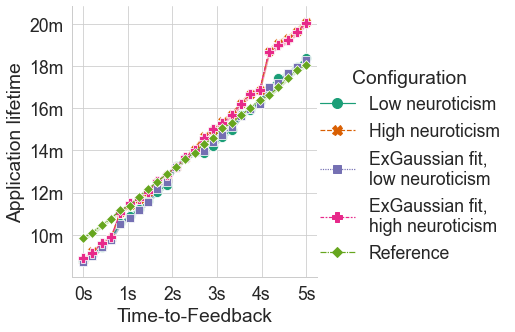

In [3]:
import  matplotlib.ticker as tkr

fg = sns.relplot(
    kind="line",
    # err_style="ba",
    data=results[results["step"] == results["step"].max()],
    x="ttf",
    y="cumulative_duration_min",
    hue="Configuration",
    # aspect=1.5,
    style="Configuration",
    markers=True,
    markersize=10,
)
for ax in fg.axes.flat:
    ax.xaxis.set_major_locator(tkr.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(tkr.MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:0.0f}m"))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{x:0.0f}s"))
for legend_handle in fg.legend.legendHandles:
    legend_handle.set_markersize(10)
fg.set_axis_labels("Time-to-Feedback", "Application lifetime")
plt.show()

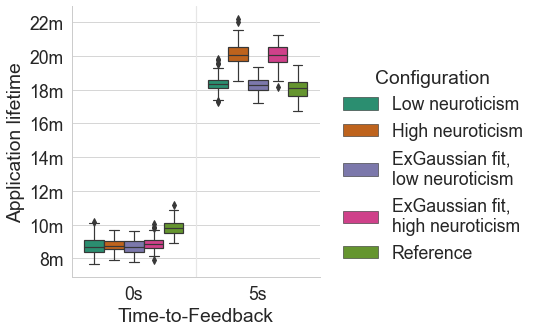

In [4]:
fg = sns.catplot(
    kind="box",
    data=results[(results["step"] == results["step"].max()) & np.isin(results["ttf"], (0.0, 5.0))],
    x="ttf",
    y="cumulative_duration_min",
    hue="Configuration",
    # aspect=1.5,
    # style="Configuration",
    # markers=True,
)
for ax in fg.axes.flat:
    # ax.xaxis.set_major_locator(tkr.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(tkr.MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:0.0f}m"))
    ax.set_xticklabels(["0s", "5s"])
    # ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{p:0.0f}s"))

fg.refline(x=0.5, linestyle="-", color=".9")
fg.set_axis_labels("Time-to-Feedback", "Application lifetime")
plt.show()

In [21]:
durations = (
    results[(results["step"] == results["step"].max()) & np.isin(results["ttf"], (0.0, 1.25, 2.5, 3.75, 5.0))]
    [["Configuration", "cumulative_duration", "repetition", "ttf"]]
    .set_index(["Configuration", "ttf", "repetition"], verify_integrity=True)
)
durations

cumulative_duration
Configuration    ttf repetition                     
Reference        0.0 1                    573.714344
                     2                    545.987371
                     3                    595.494591
                     4                    554.284038
                     5                    622.702275
...                                              ...
High neuroticism 5.0 86                  1231.337407
                     87                  1332.326082
                     88                  1180.066742
                     89                  1210.857204
                     90                  1140.338726

[2250 rows x 1 columns]

In [36]:
ix = pd.IndexSlice
ref_durations = durations.loc[ix["Reference"], "cumulative_duration"]
ref_durations

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43003/2151793829.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  ref_durations = durations.loc[ix["Reference"], "cumulative_duration"]


ttf  repetition
0.0  1              573.714344
     2              545.987371
     3              595.494591
     4              554.284038
     5              622.702275
                      ...     
5.0  86            1084.410484
     87            1080.747008
     88            1050.043164
     89            1046.777528
     90            1054.297533
Name: cumulative_duration, Length: 450, dtype: float64

In [29]:
non_ref_durations = durations[durations.index.map(lambda i: i[0] != "Reference")].copy()
non_ref_durations

cumulative_duration
Configuration                    ttf repetition                     
ExGaussian fit,\nlow neuroticism 0.0 1                    508.245541
                                     2                    487.976260
                                     3                    538.828567
                                     4                    541.267870
                                     5                    550.047717
...                                                              ...
High neuroticism                 5.0 86                  1231.337407
                                     87                  1332.326082
                                     88                  1180.066742
                                     89                  1210.857204
                                     90                  1140.338726

[1800 rows x 1 columns]

In [99]:
import pingouin as pg

ix = pd.IndexSlice

def diff_wrt_reference(ttf_df: pd.DataFrame) -> pd.DataFrame:
    ref_durations = ttf_df.loc[ix["Reference"], "cumulative_duration"].to_numpy()

    def _diff_wrt_ref(durations: pd.Series) -> pd.Series:
        ref_mean = ref_durations.mean()
        ttest = pg.ttest(durations.to_numpy(), ref_durations, alternative="two-sided")
        diff_raw = durations.mean() - ref_mean
        diff = diff_raw / ref_mean
        ci = ttest.at["T-test", "CI95%"]

        return pd.Series({"diff": diff, "diff_raw": diff_raw, "p-val": ttest.at["T-test", "p-val"], "CI95_Low": ci[0] / ref_mean, "CI95_High": ci[1] /ref_mean}, name="Result")

    return ttf_df.groupby("Configuration", observed=True)["cumulative_duration"].apply(_diff_wrt_ref)

duration_diff = durations.groupby(["ttf"], observed=True).apply(diff_wrt_reference).stack(level=0).reset_index()
duration_diff = duration_diff[duration_diff["Configuration"] != "Reference"].copy()
duration_diff["Configuration"] = duration_diff["Configuration"].cat.remove_unused_categories()
duration_diff

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43003/2758846058.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  ref_durations = ttf_df.loc[ix["Reference"], "cumulative_duration"].to_numpy()
/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43003/2758846058.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  ref_durations = ttf_df.loc[ix["Reference"], "cumulative_duration"].to_numpy()
/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43003/2758846058.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  ref_durations = ttf_df.loc[ix["Reference"], "cumulative_duration"].to_numpy()
/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43003/2758846058.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  ref_durations = ttf_df.loc[ix["Reference"], "cumulative_duration"].to_numpy()
/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43003

,ttf,Configuration,CI95_High,CI95_Low,diff,diff_raw,p-val
0,0.00,Low neuroticism,-0.097918,-0.127189,-0.112547,-66.480915,6.431096e-34
1,0.00,High neuroticism,-0.093618,-0.118809,-0.106214,-62.739989,4.161816e-38
2,0.00,"ExGaussian fit,\nlow neuroticism",-0.102726,-0.130033,-0.116376,-68.742816,1.230886e-38
3,0.00,"ExGaussian fit,\nhigh neuroticism",-0.085018,-0.110835,-0.097923,-57.842615,2.587152e-33
5,1.25,Low neuroticism,-0.035435,-0.060707,-0.048070,-34.009381,2.760402e-12
6,1.25,High neuroticism,0.004495,-0.021357,-0.008429,-5.963578,1.999791e-01
7,1.25,"ExGaussian fit,\nlow neuroticism",-0.043138,-0.065230,-0.054183,-38.333744,4.552691e-18
8,1.25,"ExGaussian fit,\nhigh neuroticism",0.003647,-0.019477,-0.007913,-5.598522,1.783854e-01
10,2.50,Low neuroticism,0.011962,-0.008435,0.001767,1.472588,7.328452e-01
11,2.50,High neuroticism,0.024020,-0.000540,0.011738,9.783372,6.080235e-02


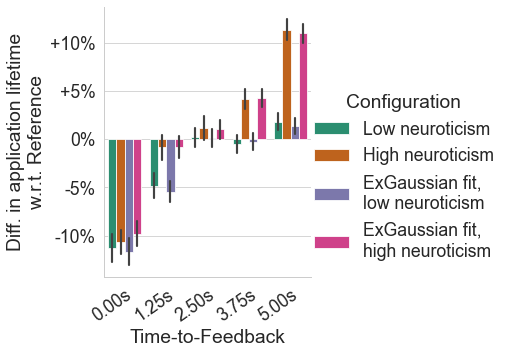

In [128]:
plot_data = duration_diff.copy().set_index(["Configuration", "ttf"], verify_integrity=True)
plot_data = pd.concat((
    plot_data.copy()[["CI95_High"]].rename(columns={"CI95_High": "diff"}),
    plot_data.copy()[["CI95_Low"]].rename(columns={"CI95_Low": "diff"}),
    plot_data.copy()[["diff"]],
)).reset_index()
plot_data["ttf"] = plot_data["ttf"].map(lambda e: f"{e:0.2f}s")


fg = sns.catplot(
    kind="bar",
    data=plot_data,
    estimator=lambda e: sorted(e)[1],
    errorbar=lambda e: (min(e), max(e)),
    x="ttf",
    y="diff",
    hue="Configuration",
    aspect=1,
    # yerr=duration_diff["CI95%"].to_numpy(),
)
fg.set_axis_labels("Time-to-Feedback", "Diff. in application lifetime\nw.r.t. Reference")
for ax in fg.axes.flat:
    # ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{:0.2f}s"))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:+0.0%}" if y != 0.0 else "0%"))
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")
plt.show()

In [5]:
durations = (
    results[(results["step"] == results["step"].max()) & np.isin(results["ttf"], (0.0, 1.25, 2.5, 3.75, 5.0))]
    .groupby(["Configuration", "ttf"])
    ["cumulative_duration_min"]
    .mean()
)
durations

Configuration                      ttf 
Low neuroticism                    0.00     8.736916
                                   1.25    11.224711
                                   2.50    13.915647
                                   3.75    15.918266
                                   5.00    18.373802
High neuroticism                   0.00     8.799265
                                   1.25    11.692141
                                   2.50    14.054160
                                   3.75    16.660057
                                   5.00    20.095140
ExGaussian fit,\nlow neuroticism   0.00     8.699218
                                   1.25    11.152639
                                   2.50    13.909454
                                   3.75    15.954037
                                   5.00    18.296944
ExGaussian fit,\nhigh neuroticism  0.00     8.880888
                                   1.25    11.698226
                                   2.50    14.029961
      

In [6]:
ix = pd.IndexSlice
ref_durations = durations.loc[ix["Reference"]]
ref_durations

ttf
0.00     9.844932
1.25    11.791534
2.50    13.891104
3.75    15.995935
5.00    18.048755
Name: cumulative_duration_min, dtype: float64

In [7]:
durations_diff_wrt_ref = (
    durations
    .groupby(["Configuration"])
    .apply(lambda df: (df - ref_durations.to_numpy()) / ref_durations.to_numpy())
    # .apply(lambda e: f"{e:+0.2%} wrt to reference")
)
_out = durations_diff_wrt_ref.apply(lambda e: f"{e:+0.2%} wrt to reference")

durations_diff_wrt_ref = durations_diff_wrt_ref.reset_index()
durations_diff_wrt_ref = durations_diff_wrt_ref[durations_diff_wrt_ref["Configuration"] != "Reference"].copy()
durations_diff_wrt_ref["Configuration"] = durations_diff_wrt_ref["Configuration"].cat.remove_unused_categories()
# durations_diff_wrt_ref["Time-to-Feedback"] = durations_diff_wrt_ref["ttf"].apply(lambda e: f"{e:0.2f}s")

_out

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43003/848193500.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda df: (df - ref_durations.to_numpy()) / ref_durations.to_numpy())


Configuration                      ttf 
Low neuroticism                    0.00    -11.25% wrt to reference
                                   1.25     -4.81% wrt to reference
                                   2.50     +0.18% wrt to reference
                                   3.75     -0.49% wrt to reference
                                   5.00     +1.80% wrt to reference
High neuroticism                   0.00    -10.62% wrt to reference
                                   1.25     -0.84% wrt to reference
                                   2.50     +1.17% wrt to reference
                                   3.75     +4.15% wrt to reference
                                   5.00    +11.34% wrt to reference
ExGaussian fit,\nlow neuroticism   0.00    -11.64% wrt to reference
                                   1.25     -5.42% wrt to reference
                                   2.50     +0.13% wrt to reference
                                   3.75     -0.26% wrt to reference
        

Configuration                      ttf 
Low neuroticism                    0.00     8.736916
                                   1.25    11.224711
                                   2.50    13.915647
                                   3.75    15.918266
                                   5.00    18.373802
High neuroticism                   0.00     8.799265
                                   1.25    11.692141
                                   2.50    14.054160
                                   3.75    16.660057
                                   5.00    20.095140
ExGaussian fit,\nlow neuroticism   0.00     8.699218
                                   1.25    11.152639
                                   2.50    13.909454
                                   3.75    15.954037
                                   5.00    18.296944
ExGaussian fit,\nhigh neuroticism  0.00     8.880888
                                   1.25    11.698226
                                   2.50    14.029961
      

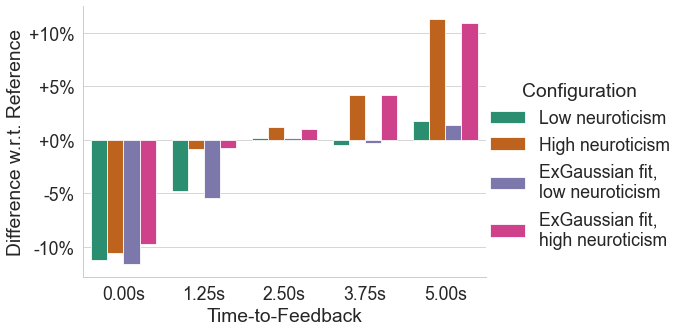

In [8]:
ttfs = durations_diff_wrt_ref["ttf"].unique()

fg = sns.catplot(
    kind="bar",
    data=durations_diff_wrt_ref,
    y="cumulative_duration_min",
    hue="Configuration",
    x="ttf",
    aspect=1.5,
)
for ax in fg.axes.flat:
    # ax.xaxis.set_major_locator(tkr.MaxNLocator(integer=True))
    # ax.yaxis.set_major_locator(tkr.MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:+2.0%}"))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{ttfs[p]:2.2f}s"))

    # ax.set_xticklabels(["0s", "5s"])

# fg.legend.set_title("TTF")
# for legend_handle in fg.legend.legendHandles:
#     legend_handle.set_markersize(10)

fg.set_axis_labels("Time-to-Feedback", "Difference w.r.t. Reference")
plt.show()